<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/Spark_nlp_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)



[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb)

In [25]:
# Last amended: 21st Nov, 2021

# About Spark-NLP

7th most popular across all AI frameworks and tools. Most widely used NLP library. See [here](https://www.kdnuggets.com/2019/06/spark-nlp-getting-started-with-worlds-most-widely-used-nlp-library-enterprise.html)

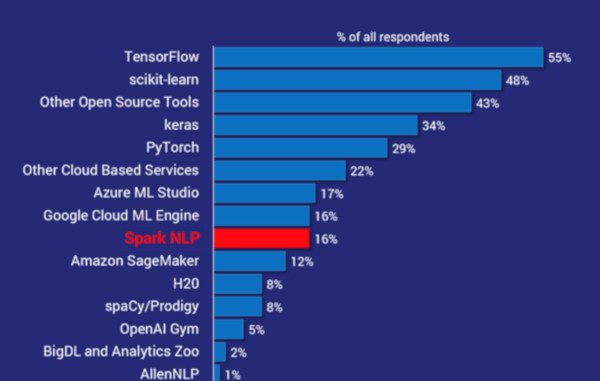

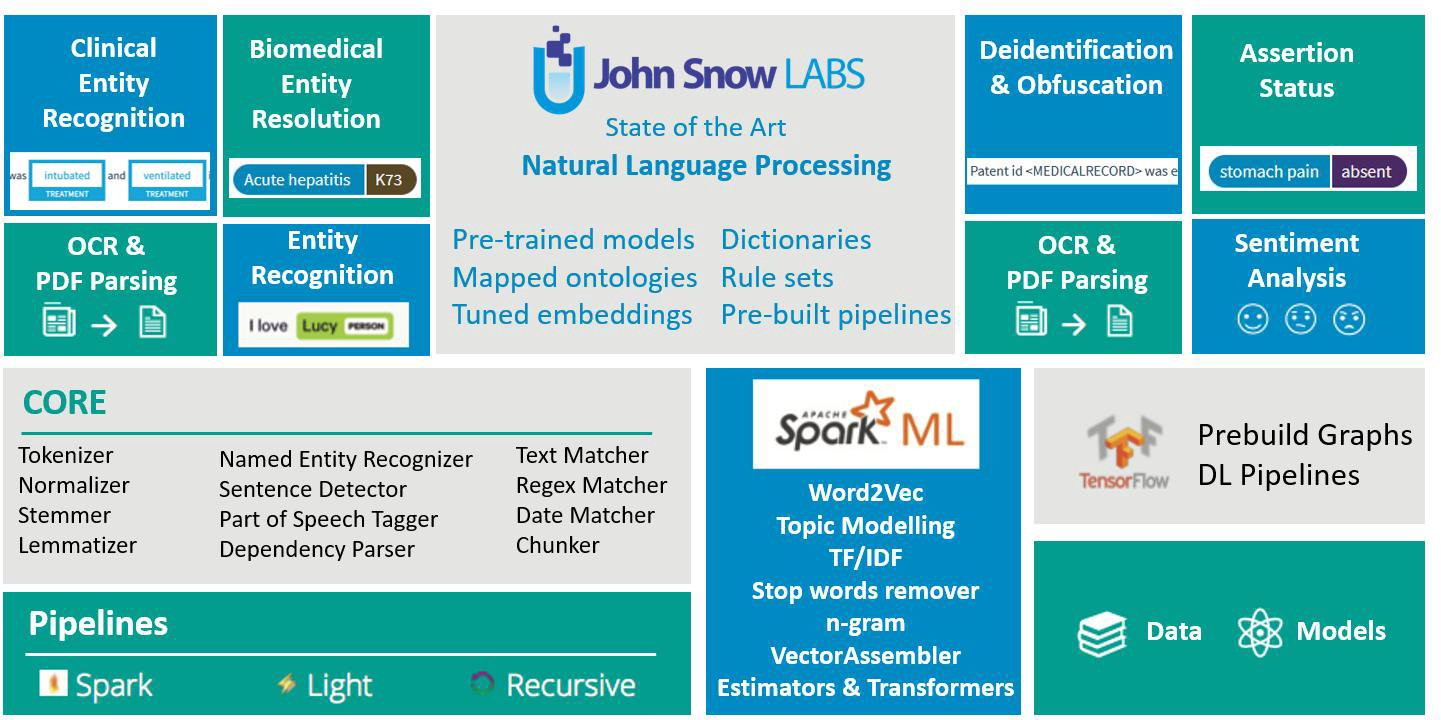

# Text Classification with ClassifierDL
Sentiment analysis of data with multiple sentiment-classes

Refer [here](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl) <br>
For appropriate spark-nlp models and pipeline make a search [here](https://nlp.johnsnowlabs.com/models)<br>
For a complete tutorial, please refer [here](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb)


Relevant blogposts: <br>
1.  https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32
2. https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59
3. https://towardsdatascience.com/how-to-wrap-your-head-around-spark-nlp-a6f6a968b7e8

A simple text classification application usually follows these steps:  

> Text preprocessing & cleaning  

> Feature engineering (creating handcrafted features from text)  

> Feature vectorization (TfIDF, CountVectorizer, encoding) or embedding (word2vec, doc2vec, Bert, Elmo, sentence embeddings, etc.)  

> Training a model with ML and DL algorithms.  



There are several text classification options in Spark NLP:  

> Text preprocessing in Spark NLP and using ML algorithms from Spark ML  

> Text preprocessing and word embeddings (Glove, Bert, Elmo) in Spark NLP and ML algorithms from Spark ML  

> Text preprocessing and sentence embeddings (Universal Sentence Encoders) in Spark NLP and ML algorithms from Spark ML  

> Text preprocessing and ClassifierDL (TensorFlow based DL architecture) in Spark NLP  


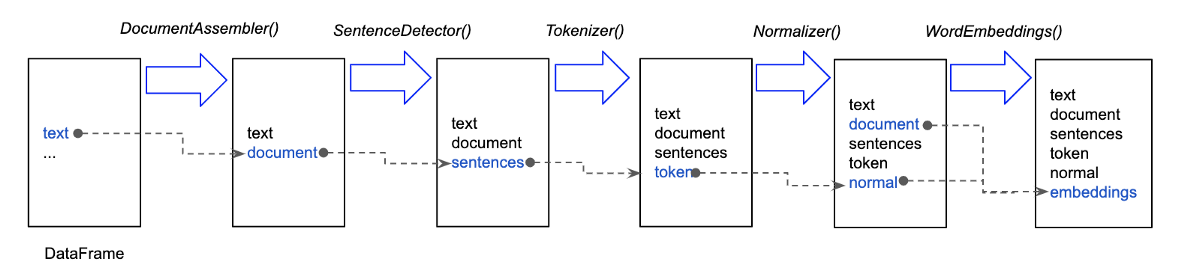

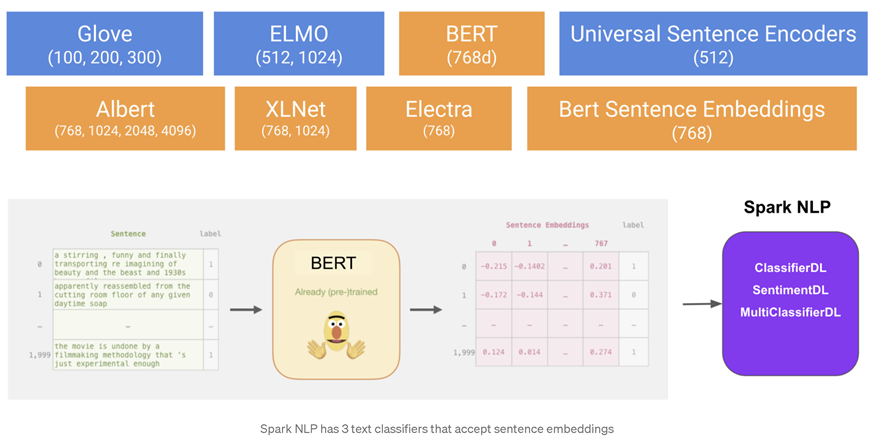

Universal Sentence Encoders (USE)
Before building any Deep Learning model in Natural Language Processing (NLP), text embedding plays a major role. The text embedding converts text (words or sentences) into a numerical vector.
Basically, the text embedding methods encode words and sentences in fixed-length dense vectors to drastically improve the processing of textual data. The idea is simple: Words that occur in the same contexts tend to have similar meanings.
Techniques like Word2vec and Glove do that by converting a word to vector. Thus the corresponding vector of “cat” will be closer to “dog” than “eagle”. But while embedding a sentence, along with words the context of the whole sentence needs to be captured in that vector. This is where the “Universal Sentence Encoder” comes into the picture.
The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering, and other natural language tasks. The pre-trained Universal Sentence Encoder is publicly available in Tensorflow-hub . It comes with two variations i.e. one trained with Transformer encoder and the other trained with Deep Averaging Network (DAN).
Spark NLP also use Tensorflow-hub version of USE that is wrapped in a way to get it run in the Spark environment. That is, you can just plug and play this embedding in Spark NLP and train a model in a distributed fashion.
Instead of averaging the word embeddings of each word in a sentence to get a sentence embeddings, USE generates embeddings for the sentence with no further calculation.

## Colab Setup
Install spark and spark-nlp

In [1]:
# 1.0 Installs pyspark, spark-nlp and findspark

!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

# !bash colab.sh
# -p is for pyspark
# -s is for spark-nlp
# !bash colab.sh -p 3.1.1 -s 3.0.1
# by default they are set to the latest



--2021-11-21 12:22:34--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-11-21 12:22:34--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-11-21 12:22:35--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [2]:
#1.1  To check contents of colab.sh, just download 
#     colab.sh and examine its contents:

!wget http://setup.johnsnowlabs.com/colab.sh 

! cat /content/colab.sh


--2021-11-21 12:23:14--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-11-21 12:23:15--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-11-21 12:23:15--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

## Call libraries
And create spark session

In [7]:
# 2.0 Call libraries
import pandas as pd
import numpy as np

# 2.1 spark related
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType, StringType,StructField,StructType
#Replace part of string with another string
from pyspark.sql.functions import regexp_replace

# 2.2 Spark-nlp related
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *

In [8]:
# 2.3 Create Spark session
#     And start sparknlp

spark = sparknlp.start()

In [9]:
# 2.4 Show multiple command outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Spark NLP pretrained-pipeline
A quick use of spark-nlp.  
Refer [KDnuggets](https://www.kdnuggets.com/2019/06/spark-nlp-getting-started-with-worlds-most-widely-used-nlp-library-enterprise.html) and this [page](https://nlp.johnsnowlabs.com/2021/03/24/analyze_sentiment_en.html).

In [ ]:
# Pretrained Sentiment pipeline:
# Refer: https://nlp.johnsnowlabs.com/2021/03/24/analyze_sentiment_en.html
# And: KDnuggets: https://www.kdnuggets.com/2019/06/spark-nlp-getting-started-with-worlds-most-widely-used-nlp-library-enterprise.html

In [ ]:
from sparknlp.pretrained import PretrainedPipeline
pipeline = PretrainedPipeline('analyze_sentiment', lang = 'en')
result =  pipeline.annotate("Movie was worthless ")
print(result)

## Mount gdrive
And set path to data

In [ ]:
# 2.3 Mount gdrive to read data
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 2.4
pathToFoler = "/gdrive/MyDrive/Colab_data_files/corona_nlp/"
fileName = "Corona_NLP_test.csv"

## Load Data

### Read using pandas

In [ ]:
# 3.1 Read dataset using pandas
f = pd.read_csv(pathToFoler+fileName)
f.head(3)
f.shape
f['Sentiment'].value_counts()


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive


(3798, 6)

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [ ]:
# 3.2 Transform pandas to spark dataframe:

g = f[['OriginalTweet','Sentiment']].copy()
cor_data =spark.createDataFrame(g)

In [ ]:
# 3.3 Examine it:

cor_data.show(truncate=False)
cor_data.count()      # 3798

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
|OriginalTweet                                                                                                                                                                                                                                                                                                                 |Sentiment         |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+

3798

### Read using pyspark-I

In [ ]:
# 4.0 Read data directly in spark a normal manner:

data = spark.read.csv(
                      path = pathToFoler + fileName,
                      inferSchema=True,
                      header=True
                      )

In [ ]:
# 4.1 Obviously there are problems 
data.show(4)
data.count()    # 6792

+--------+----------+-----------+----------+--------------------+------------------+
|UserName|ScreenName|   Location|   TweetAt|       OriginalTweet|         Sentiment|
+--------+----------+-----------+----------+--------------------+------------------+
|       1|     44953|        NYC|02-03-2020|TRENDING: New Yor...|Extremely Negative|
|       2|     44954|Seattle, WA|02-03-2020|When I couldn't f...|          Positive|
|       3|     44955|       null|02-03-2020|Find out how you ...|Extremely Positive|
|       4|     44956|Chicagoland|02-03-2020|#Panic buying hit...|              null|
+--------+----------+-----------+----------+--------------------+------------------+
only showing top 4 rows



6792

The mismatch between pandas read and pyspark read, necessiates examinig data closely. On examining data one finds that there are many sentences, as below:

```
7,44959,,03-03-2020,Voting in the age of #coronavirus = hand sanitizer ? #SuperTuesday https://t.co/z0BeL4O6Dk,Positive
8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We cant stop #COVID19 without protecting #healthworkers.

```

The above is an extract from a single tweet. Ihe tweet is on multiple lines and also having <u>double</u>, double-inverted-commas. This complicates reading in pyspark. The solution is presented in StackOverflow at [this link](https://stackoverflow.com/a/69126284). We, therefore, proceed as follows:

### Read using pyspark-II

In [ ]:
# 5.0 First define a Spark schema:
schema = StructType([ \
                     StructField("UserName",StringType(),True), \
                     StructField("ScreenName",StringType(),True), \
                     StructField("Location",StringType(),True), \
                     StructField("TweetAt", StringType(), True), \
                     StructField("OriginalTweet", StringType(), True), \
                     StructField("Sentiment", StringType(), True) \
  ])
 

In [ ]:
# 5.1 Next read the data:

trainDataset = spark.read  \
                 .option("quote", "\"") \
                 .option('escape', "\"") \
                 .option("multiLine", "true")  \
                 .option("schema" , schema)  \
                 .option("header", "true") \
                 .csv(pathToFoler + fileName)

In [ ]:
# 5.2 The result shows complete match with pandas:
trainDataset.show()
trainDataset.count()    # 3798

+--------+----------+--------------------+----------+--------------------+------------------+
|UserName|ScreenName|            Location|   TweetAt|       OriginalTweet|         Sentiment|
+--------+----------+--------------------+----------+--------------------+------------------+
|       1|     44953|                 NYC|02-03-2020|TRENDING: New Yor...|Extremely Negative|
|       2|     44954|         Seattle, WA|02-03-2020|When I couldn't f...|          Positive|
|       3|     44955|                null|02-03-2020|Find out how you ...|Extremely Positive|
|       4|     44956|         Chicagoland|02-03-2020|#Panic buying hit...|          Negative|
|       5|     44957| Melbourne, Victoria|03-03-2020|#toiletpaper #dun...|           Neutral|
|       6|     44958|         Los Angeles|03-03-2020|Do you remember t...|           Neutral|
|       7|     44959|                null|03-03-2020|Voting in the age...|          Positive|
|       8|     44960| Geneva, Switzerland|03-03-2020|@DrTedr

3798

In [ ]:
# 5.3 Distribution of classes:
from pyspark.sql.functions import col

# 5.3.1
trainDataset.groupBy("Sentiment") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+------------------+-----+
|         Sentiment|count|
+------------------+-----+
|          Negative| 1041|
|          Positive|  947|
|           Neutral|  619|
|Extremely Positive|  599|
|Extremely Negative|  592|
+------------------+-----+



In [ ]:
# 5.4 Data being less, merge classes:

# 5.4.1 Change 'Extremely Negative' to 'Negative':
trainDataset = trainDataset.replace('Extremely Negative', 'Negative')

# 5.4.2 Change 'Extremely Positive' to 'Positive':
trainDataset = trainDataset.replace('Extremely Positive', 'Positive')

In [ ]:
# 5.4.3 Check distribution of classes again:

trainDataset.groupBy("Sentiment") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()

+---------+-----+
|Sentiment|count|
+---------+-----+
| Negative| 1633|
| Positive| 1546|
|  Neutral|  619|
+---------+-----+



## ClassiferDL with Word Embeddings and Text Preprocessing

In [ ]:
# 6.0 Split data:

(trainingData, testData) = trainDataset.randomSplit([0.8, 0.2], seed = 100)

# 6.0.1
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))


Training Dataset Count: 3066
Test Dataset Count: 732


### Pipeline for cleaning data

In [ ]:
# 6.1
document_assembler = DocumentAssembler() \
    .setInputCol("OriginalTweet") \
    .setOutputCol("document")

# 6.2    
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# 6.3      
normalizer = Normalizer() \
    .setInputCols(["token"]) \
    .setOutputCol("normalized")

# 6.4
stopwords_cleaner = StopWordsCleaner()\
    .setInputCols("normalized")\
    .setOutputCol("cleanTokens")\
    .setCaseSensitive(False)

# 6.5
lemma = LemmatizerModel.pretrained('lemma_antbnc') \
    .setInputCols(["cleanTokens"]) \
    .setOutputCol("lemma")


lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]


### With Glove 100d embeddings

In [ ]:
# 7.0
glove_embeddings = WordEmbeddingsModel().pretrained() \
      .setInputCols(["document",'lemma'])\
      .setOutputCol("embeddings")\
      .setCaseSensitive(False)

# 7.1
embeddingsSentence = SentenceEmbeddings() \
      .setInputCols(["document", "embeddings"]) \
      .setOutputCol("sentence_embeddings") \
      .setPoolingStrategy("AVERAGE")

# 7.2
classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("Sentiment")\
      .setMaxEpochs(100)\
      .setEnableOutputLogs(True)
      #.setOutputLogsPath('logs')

# 7.3
clf_pipeline = Pipeline(
    stages=[document_assembler, 
            tokenizer,
            normalizer,
            stopwords_cleaner, 
            lemma, 
            glove_embeddings,
            embeddingsSentence,
            classsifierdl])

glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]


In [ ]:
'''
default classifierDL params:

    maxEpochs -> 10,
    lr -> 5e-3f,
    dropout -> 0.5f,
    batchSize -> 64,
    enableOutputLogs -> false,
    verbose -> Verbose.Silent.id,
    validationSplit -> 0.0f,
    outputLogsPath -> ""
    
'''

### Start training

In [ ]:
# 8.0 Train 
%%time

clf_pipelineModel = clf_pipeline.fit(trainingData)

CPU times: user 563 ms, sys: 61.6 ms, total: 625 ms
Wall time: 1min 32s


In [ ]:
# 8.1 logs:

import os
log_file_name = os.listdir("/root/annotator_logs")[0]

# 8.1.1
with open("/root/annotator_logs/"+log_file_name, "r") as log_file :
    print(log_file.read())

### Predictions

In [ ]:
# 9.0 Get the predictions on test Set

preds = clf_pipelineModel.transform(testData)

In [ ]:
# 9.1 Select few columns:

preds.select('Sentiment','OriginalTweet',"class.result").show(10, truncate=80)

+---------+--------------------------------------------------------------------------------+----------+
|Sentiment|                                                                   OriginalTweet|    result|
+---------+--------------------------------------------------------------------------------+----------+
| Negative|I'm still trying to figure out why people are going nuts buying half the groc...|[Negative]|
| Negative|I think #Covid_19 has shown the UKs true colours. 
Everyone hates everyone a...|[Positive]|
| Positive|I'm sending love to doctors, nurses and supermarket employees across the worl...|[Positive]|
| Negative|@totemranch613 @sohos1963 This=as bad for the ?as the Paris Accord:IT'S  PLAI...|[Negative]|
| Positive|Happy to report that I jumped on the panic shopping band wagon weeks ago and ...|[Negative]|
| Negative|I ve never seen it so crowded It was crazy in there  Shopper at Stop amp Shop...|[Negative]|
|  Neutral|    Long lines at a grocery store in Caloocan #COVID20

In [ ]:
# 9.2

preds_df = preds.select('Sentiment','OriginalTweet',"class.result").toPandas()

# The result is an array since in Spark NLP you can have multiple sentences.
# Let's explode the array and get the item(s) inside of result column out

# 9.3
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])


In [ ]:
# 9.4 We are going to use sklearn to evalute 
#      the results on test dataset:

from sklearn.metrics import classification_report

# 9.5
print (classification_report(preds_df['result'], preds_df['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72       355
     Neutral       0.42      0.52      0.47        77
    Positive       0.66      0.65      0.66       300

    accuracy                           0.66       732
   macro avg       0.61      0.63      0.61       732
weighted avg       0.67      0.66      0.67       732



## Text Summarization
See [here](https://nlp.johnsnowlabs.com/2020/12/21/t5_small_en.html) for quick code.

The example uses pre-trained data summarizer

In [22]:
# File 'space.txt' is available in the folder:
#  D:\data\OneDrive\Documents\sparknlp
#   The text file 'space.txt; was copied and
#     pasted without any cleaning
#      from Wikipedia https://en.wikipedia.org/wiki/Space
#  Being small, upload the file directly to /content
#  in colab VM.

# Read the text file as DataFrame
data_df = spark.read.text('/content/space.txt').toDF('text')
data_df.show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
# Write pipeline for text-summarization:
# Refer: https://nlp.johnsnowlabs.com/2020/12/21/t5_small_en.html

document_assembler = DocumentAssembler() \
                    .setInputCol("text") \
                    .setOutputCol("documents")

t5 = T5Transformer() \
            .pretrained("t5_small") \
            .setTask("summarize:")\
            .setMaxOutputLength(200)\
            .setInputCols(["documents"]) \
            .setOutputCol("summaries")

pipeline = Pipeline().setStages([document_assembler, t5])
results = pipeline.fit(data_df).transform(data_df)

results.select("summaries.result").show(truncate=False)

t5_small download started this may take some time.
Approximate size to download 139 MB
[OK!]
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                              |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[space]                                                                                                                                                              

## With Bert Embeddings

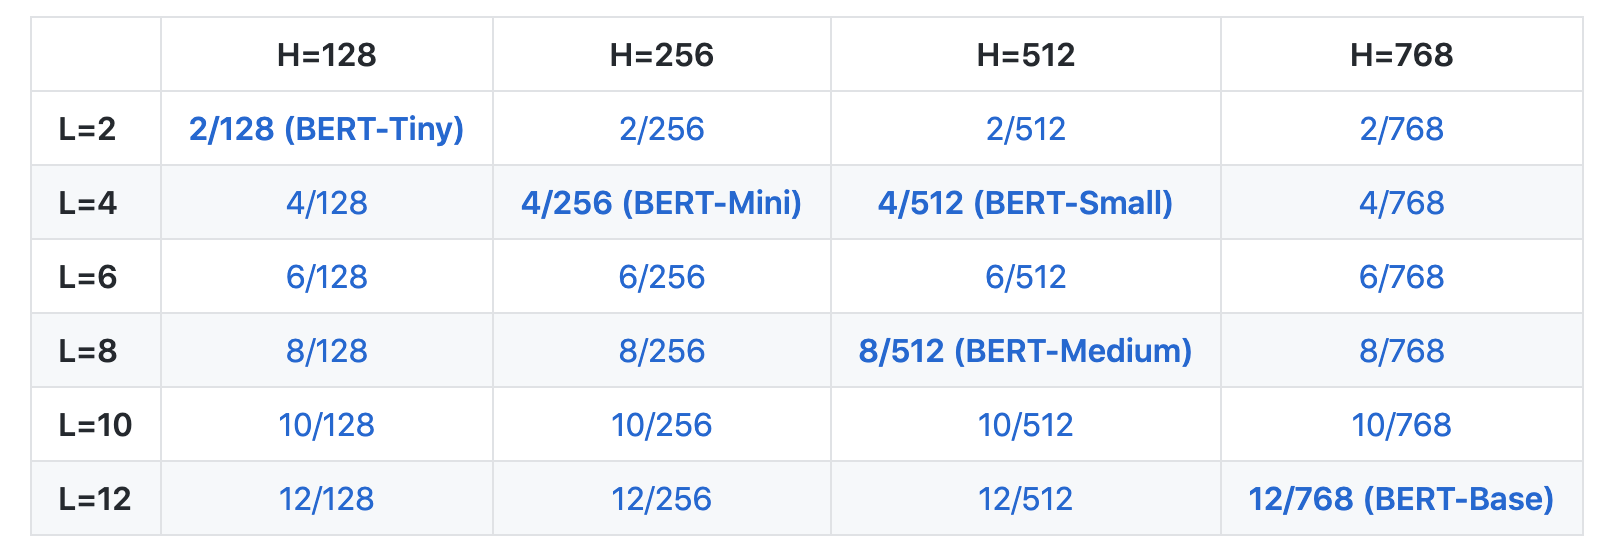

In [ ]:
epochs = 4

document_assembler = DocumentAssembler() \
    .setInputCol("OriginalTweet") \
    .setOutputCol("document")
    
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")
      
bert_embeddings = BertEmbeddings().pretrained(name='small_bert_L4_256', lang='en') \
    .setInputCols(["document",'token'])\
    .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")

classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("Sentiment")\
    .setMaxEpochs(epochs)\
    .setLr(0.001)\
    .setBatchSize(8)\
    .setEnableOutputLogs(True)
    #.setOutputLogsPath('logs')

bert_clf_pipeline = Pipeline(stages=[
    document_assembler, 
    tokenizer,
    bert_embeddings,
    embeddingsSentence,
    classsifierdl
])

small_bert_L4_256 download started this may take some time.
Approximate size to download 40.5 MB
[OK!]


In [ ]:
# training will take some time due to Bert (use GPU runtime when possible)
%%time

bert_clf_pipelineModel = bert_clf_pipeline.fit(trainingData)

CPU times: user 757 ms, sys: 79.5 ms, total: 837 ms
Wall time: 2min 17s


In [ ]:
log_file_name = os.listdir("/root/annotator_logs")[0]

with open("/root/annotator_logs/"+log_file_name, "r") as log_file :
    print(log_file.read())

In [ ]:
# We are going to use sklearn to evalute the results on test dataset
from sklearn.metrics import classification_report

preds = bert_clf_pipelineModel.transform(testData)

preds_df = preds.select('Sentiment','OriginalTweet',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['result'], preds_df['Sentiment']))


              precision    recall  f1-score   support

    Negative       0.68      0.68      0.68       343
     Neutral       0.46      0.53      0.49        83
    Positive       0.62      0.59      0.61       306

    accuracy                           0.63       732
   macro avg       0.59      0.60      0.59       732
weighted avg       0.63      0.63      0.63       732



## ClassifierDL with Universal Sentence Embeddings

In [ ]:
# actual content is inside description column
document = DocumentAssembler()\
      .setInputCol("description")\
      .setOutputCol("document")

# we can also use sentece detector here if we want to train on and get predictions for each sentence
use = UniversalSentenceEncoder.pretrained("tfhub_use_lg", "en") \
      .setInputCols("document") \
      .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("category")\
      .setMaxEpochs(3)\
      .setLr(0.001)\
      .setBatchSize(8)\
      .setEnableOutputLogs(True)

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
    ])

tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
[OK!]


In [ ]:
%%time 
use_pipelineModel = use_clf_pipeline.fit(trainDataset)

CPU times: user 29.4 s, sys: 2.99 s, total: 32.4 s
Wall time: 1h 31min 50s


In [ ]:
log_files = os.listdir("/root/annotator_logs")
log_files

['ClassifierDLApproach_88a3ca052879.log',
 'ClassifierDLApproach_39e4a8836477.log',
 'ClassifierDLApproach_aa74a87a3e23.log']

In [ ]:
with open("/root/annotator_logs/"+log_files[0], "r") as log_file :
    print(log_file.read())

Training started - epochs: 3 - learning_rate: 0.001 - batch_size: 8 - training_examples: 120000 - classes: 4
Epoch 0/3 - 169.30s - loss: 12752.649 - acc: 0.8934 - batches: 15000
Epoch 1/3 - 170.21s - loss: 12622.969 - acc: 0.90115 - batches: 15000
Epoch 2/3 - 173.70s - loss: 12579.703 - acc: 0.90440834 - batches: 15000



### with BertSentenceEmbeddings

#### `sent_small_bert_L8_512` Model

In [ ]:
# actual content is inside description column
document = DocumentAssembler()\
      .setInputCol("description")\
      .setOutputCol("document")
    
# we can also use sentece detector here if we want to train on and get predictions for each sentence

bert_sent = BertSentenceEmbeddings.pretrained('sent_small_bert_L8_512')\
      .setInputCols(["document"])\
      .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("category")\
      .setMaxEpochs(10)\
      .setEnableOutputLogs(True)\
      .setLr(0.001)

bert_sent_clf_pipeline = Pipeline(
    stages = [
        document,
        bert_sent,
        classsifierdl
    ])

sent_small_bert_L8_512 download started this may take some time.
Approximate size to download 149.1 MB
[OK!]


In [ ]:
%%time
bert_sent_pipelineModel = bert_sent_clf_pipeline.fit(trainDataset)

CPU times: user 11.7 s, sys: 1.66 s, total: 13.4 s
Wall time: 38min 28s


In [ ]:
from sklearn.metrics import classification_report

preds = bert_sent_pipelineModel.transform(testDataset)

preds_df = preds.select('category','description',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['result'], preds_df['category']))


              precision    recall  f1-score   support

    Business       0.85      0.85      0.85      1912
    Sci/Tech       0.89      0.84      0.86      2011
      Sports       0.97      0.95      0.96      1952
       World       0.85      0.94      0.89      1725

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



In [ ]:
log_files = os.listdir("/root/annotator_logs")

with open("/root/annotator_logs/"+log_files[0], "r") as log_file :
    print(log_file.read())

Training started - epochs: 10 - learning_rate: 0.001 - batch_size: 64 - training_examples: 120000 - classes: 4
Epoch 0/10 - 7.95s - loss: 1628.9716 - acc: 0.8763 - batches: 1875
Epoch 1/10 - 7.25s - loss: 1603.904 - acc: 0.887075 - batches: 1875
Epoch 2/10 - 7.13s - loss: 1598.0989 - acc: 0.8906583 - batches: 1875
Epoch 3/10 - 7.10s - loss: 1594.3523 - acc: 0.893325 - batches: 1875
Epoch 4/10 - 7.07s - loss: 1591.4575 - acc: 0.895725 - batches: 1875
Epoch 5/10 - 7.12s - loss: 1588.7573 - acc: 0.89725 - batches: 1875
Epoch 6/10 - 7.11s - loss: 1586.2809 - acc: 0.89880836 - batches: 1875
Epoch 7/10 - 7.06s - loss: 1584.1012 - acc: 0.9000583 - batches: 1875
Epoch 8/10 - 7.07s - loss: 1582.1438 - acc: 0.90125 - batches: 1875
Epoch 9/10 - 7.05s - loss: 1580.3627 - acc: 0.9023333 - batches: 1875



#### `sent_bert_use_cmlm_en_base` Model

In [ ]:
document = DocumentAssembler()\
      .setInputCol("description")\
      .setOutputCol("document")
    
bert_cmlm = BertSentenceEmbeddings.pretrained('sent_bert_use_cmlm_en_base', 'en')\
      .setInputCols(["document"])\
      .setOutputCol("sentence_embeddings")

classsifierdl = ClassifierDLApproach()\
      .setInputCols(["sentence_embeddings"])\
      .setOutputCol("class")\
      .setLabelColumn("category")\
      .setMaxEpochs(10)\
      .setEnableOutputLogs(True)\
      .setLr(0.001)

bert_cmlm_clf_pipeline = Pipeline(
    stages = [
        document,
        bert_cmlm,
        classsifierdl
    ])

sent_bert_use_cmlm_en_base download started this may take some time.
Approximate size to download 391.6 MB
[OK!]


In [ ]:
%%time
bert_cmlm_pipelineModel = bert_cmlm_clf_pipeline.fit(trainDataset)

CPU times: user 22.7 s, sys: 2.95 s, total: 25.7 s
Wall time: 1h 11min 10s


In [ ]:
from sklearn.metrics import classification_report

preds = bert_cmlm_pipelineModel.transform(testDataset)

preds_df = preds.select('category','description',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['result'], preds_df['category']))


              precision    recall  f1-score   support

    Business       0.85      0.88      0.87      1838
    Sci/Tech       0.91      0.85      0.88      2021
      Sports       0.98      0.95      0.97      1949
       World       0.88      0.94      0.91      1792

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



In [ ]:
log_files = os.listdir("/root/annotator_logs")

with open("/root/annotator_logs/"+log_files[0], "r") as log_file :
    print(log_file.read())

Training started - epochs: 10 - learning_rate: 0.001 - batch_size: 64 - training_examples: 120000 - classes: 4
Epoch 0/10 - 7.95s - loss: 1628.9716 - acc: 0.8763 - batches: 1875
Epoch 1/10 - 7.25s - loss: 1603.904 - acc: 0.887075 - batches: 1875
Epoch 2/10 - 7.13s - loss: 1598.0989 - acc: 0.8906583 - batches: 1875
Epoch 3/10 - 7.10s - loss: 1594.3523 - acc: 0.893325 - batches: 1875
Epoch 4/10 - 7.07s - loss: 1591.4575 - acc: 0.895725 - batches: 1875
Epoch 5/10 - 7.12s - loss: 1588.7573 - acc: 0.89725 - batches: 1875
Epoch 6/10 - 7.11s - loss: 1586.2809 - acc: 0.89880836 - batches: 1875
Epoch 7/10 - 7.06s - loss: 1584.1012 - acc: 0.9000583 - batches: 1875
Epoch 8/10 - 7.07s - loss: 1582.1438 - acc: 0.90125 - batches: 1875
Epoch 9/10 - 7.05s - loss: 1580.3627 - acc: 0.9023333 - batches: 1875



## Getting prediction from Trained model

In [ ]:
from sparknlp.base import LightPipeline

light_model = LightPipeline(use_pipelineModel)

In [ ]:
testDataset.select('description').take(2)

[Row(description="Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul."),
 Row(description=' TORONTO, Canada    A second team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for privately funded suborbital space flight, has officially announced the first launch date for its manned rocket.')]

In [ ]:
text='''
Fearing the fate of Italy, the centre-right government has threatened to be merciless with those who flout tough restrictions. 
As of Wednesday it will also include all shops being closed across Greece, with the exception of supermarkets. Banks, pharmacies, pet-stores, mobile phone stores, opticians, bakers, mini-markets, couriers and food delivery outlets are among the few that will also be allowed to remain open.
'''
result = light_model.annotate(text)

result['class']

['World']

In [ ]:
light_model.annotate('the soccer games will be postponed.')

{'class': ['Sports'],
 'document': ['the soccer games will be postponed.'],
 'sentence_embeddings': ['the soccer games will be postponed.']}

# SentimentDL Classifier

see also here >> `https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/SentimentDL_train_multiclass_sentiment_classifier.ipynb`

In [ ]:
!wget -q aclimdb_train.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sentiment-corpus/aclimdb/aclimdb_train.csv
!wget -q aclimdb_test.csv https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sentiment-corpus/aclimdb/aclimdb_test.csv

In [ ]:
trainDataset = spark.read \
      .option("header", True) \
      .csv("aclimdb_train.csv")

trainDataset.show()

+--------------------+--------+
|                text|   label|
+--------------------+--------+
|This is an Excell...|positive|
|The Sarah Silverm...|positive|
|"Prom Night" is a...|negative|
|So often a band w...|positive|
|"Pet Sematary" is...|positive|
|I watched the fil...|negative|
|Boy this movie ha...|negative|
|Checking the spoi...|negative|
|Despite its rathe...|positive|
|Absolute masterpi...|positive|
|The tweedy profes...|positive|
|A movie best summ...|negative|
|Take young, prett...|negative|
|For months I've b...|negative|
|"Batman: The Myst...|positive|
|Well, it was funn...|negative|
|I have seen the s...|positive|
|Brainless film ab...|negative|
|Leave it to geniu...|negative|
|Seven Pounds star...|positive|
+--------------------+--------+
only showing top 20 rows



In [ ]:
testDataset = spark.read \
      .option("header", True) \
      .csv("aclimdb_test.csv")

testDataset.show()

+--------------------+--------+
|                text|   label|
+--------------------+--------+
|The Second Woman ...|negative|
|In my opinion the...|positive|
|I am listening to...|positive|
|Before I speak my...|negative|
|ManBearPig is a p...|positive|
|A buddy and I wen...|negative|
|It is incredible ...|negative|
|Dire! Dismal! Awf...|negative|
|HLOTS was an outs...|positive|
|This is just one ...|negative|
|This movie had th...|negative|
|The 80s were over...|positive|
|The tunes are the...|positive|
|Having recently s...|positive|
|My favorite film ...|positive|
|This movie just m...|positive|
|This is the worst...|negative|
|This was a nice f...|positive|
|I don't know, may...|negative|
|After wasting 2 h...|negative|
+--------------------+--------+
only showing top 20 rows



In [ ]:
# actual content is inside description column
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained("tfhub_use_lg", "en") \
    .setInputCols("document") \
    .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
sentimentdl = SentimentDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("label")\
    .setMaxEpochs(5)\
    .setEnableOutputLogs(True)

pipeline = Pipeline(
    stages = [
        document,
        use,
        sentimentdl
    ])


tfhub_use_lg download started this may take some time.
Approximate size to download 753.3 MB
[OK!]


In [ ]:
%%time
pipelineModel = pipeline.fit(trainDataset)

CPU times: user 12.9 s, sys: 1.37 s, total: 14.3 s
Wall time: 42min 16s


In [ ]:
result = pipelineModel.transform(testDataset)

In [ ]:
result_df = result.select('text','label',"class.result").toPandas()

In [ ]:
result_df.head(10)

,text,label,result
0,The Second Woman is about the story of a myste...,negative,[positive]
1,"In my opinion the directing, editing, lighting...",positive,[positive]
2,"I am listening to Istanbul, intent, my eyes cl...",positive,[positive]
3,"Before I speak my piece, I would like to make ...",negative,[neutral]
4,ManBearPig is a pretty funny episode of South ...,positive,[neutral]
5,A buddy and I went to see this movie when it c...,negative,[negative]
6,It is incredible that there were two films wit...,negative,[negative]
7,Dire! Dismal! Awful! Laughable! Disappointing!...,negative,[negative]
8,"HLOTS was an outstanding series, its what NYPD...",positive,[positive]
9,This is just one of those films which cannot j...,negative,[negative]


# MultiLabel Classifier

see also here >> `https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/jupyter/training/english/classification/MultiClassifierDL_train_multi_label_toxic_classifier.ipynb`

In [ ]:
!curl -O 'https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/toxic_comments/toxic_train.snappy.parquet'
!curl -O 'https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/toxic_comments/toxic_test.snappy.parquet'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2702k  100 2702k    0     0  2963k      0 --:--:-- --:--:-- --:--:-- 2959k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  289k  100  289k    0     0   476k      0 --:--:-- --:--:-- --:--:--  475k


In [ ]:
trainDataset = spark.read.parquet("/content/toxic_train.snappy.parquet").repartition(120)
testDataset = spark.read.parquet("/content/toxic_test.snappy.parquet").repartition(10)

## Multilabel Classifier with Bert Embeddings

In [ ]:
# Let's use shrink to remove new lines in the comments
document = DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("document")\
      .setCleanupMode("shrink")

bert_sent = BertSentenceEmbeddings.pretrained('sent_small_bert_L8_512')\
      .setInputCols(["document"])\
      .setOutputCol("sentence_embeddings")

# We will use MultiClassifierDL built by using Bidirectional GRU and CNNs inside TensorFlow that supports up to 100 classes
# We will use only 5 Epochs but feel free to increase it on your own dataset
multiClassifier = MultiClassifierDLApproach()\
      .setInputCols("sentence_embeddings")\
      .setOutputCol("category")\
      .setLabelColumn("labels")\
      .setBatchSize(128)\
      .setMaxEpochs(5)\
      .setLr(1e-3)\
      .setThreshold(0.5)\
      .setShufflePerEpoch(False)\
      .setEnableOutputLogs(True)\
      .setValidationSplit(0.1)

pipeline = Pipeline(
    stages = [
        document,
        bert_sent,
        multiClassifier
    ])

sent_small_bert_L8_512 download started this may take some time.
Approximate size to download 149.1 MB
[OK!]


In [ ]:
%%time
pipelineModel = pipeline.fit(trainDataset)

CPU times: user 807 ms, sys: 86.2 ms, total: 893 ms
Wall time: 3min 33s


In [ ]:
preds = pipelineModel.transform(testDataset)

In [ ]:
preds_df = preds.select('text','labels',"category.result").toPandas()

In [ ]:
preds_df.head(10)

,text,labels,result
0,Vegan \n\nWhat in the hell does all that junk ...,[toxic],[toxic]
1,Fight Club! F**k Yeeaaaaahh!!!,"[toxic, obscene]","[toxic, obscene]"
2,"""\n\n Little quick on the trigger, ain't'cha b...",[toxic],[toxic]
3,Your user page indicates you're a left-wing li...,"[toxic, obscene, insult]",[toxic]
4,""" See all the many Google links, titled"""" Wik...",[toxic],[toxic]
5,"""\n\n LOL \n\nLOL. Seriously, """"BryanFromPalat...",[toxic],"[toxic, obscene]"
6,is it because it is of my naked mum having sex...,"[toxic, severe_toxic, obscene, insult, identit...","[toxic, severe_toxic, insult, obscene]"
7,")\na cowards site, that must stop changing thi...","[toxic, obscene]",[toxic]
8,"blow me, criticism IS constructive. \n\nBlow m...","[toxic, obscene, insult]","[toxic, obscene]"
9,On account of the project deciding to ignore h...,"[toxic, obscene, insult]",[toxic]


## Saving & loading back the trained model

In [ ]:
pipelineModel.stages

In [ ]:
# Save the Multilabel Classifier Model
pipelineModel.stages[2].write().overwrite().save('MultilabelClfBert')

In [ ]:
# Load back  saved Multilabel Classifier Model
MultilabelClfModel = MultiClassifierDLModel.load('MultilabelClfBert')

In [ ]:
# Generate prediction Pipeline with loaded Model 
ld_pipeline = Pipeline(stages=[document, bert_sent, MultilabelClfModel])
ld_pipeline_model = ld_pipeline.fit(spark.createDataFrame([['']]).toDF("text"))

In [ ]:
# Apply Model Transform to testData
ld_preds = ld_pipeline_model.transform(testDataset)

In [ ]:
ld_preds_df = ld_preds.select('text','labels',"category.result").toPandas()

In [ ]:
ld_preds_df.head(10)

,text,labels,result
0,Vegan \n\nWhat in the hell does all that junk ...,[toxic],[toxic]
1,Fight Club! F**k Yeeaaaaahh!!!,"[toxic, obscene]","[toxic, obscene]"
2,"""\n\n Little quick on the trigger, ain't'cha b...",[toxic],[toxic]
3,Your user page indicates you're a left-wing li...,"[toxic, obscene, insult]",[toxic]
4,""" See all the many Google links, titled"""" Wik...",[toxic],[toxic]
5,"""\n\n LOL \n\nLOL. Seriously, """"BryanFromPalat...",[toxic],"[toxic, obscene]"
6,is it because it is of my naked mum having sex...,"[toxic, severe_toxic, obscene, insult, identit...","[toxic, severe_toxic, insult, obscene]"
7,")\na cowards site, that must stop changing thi...","[toxic, obscene]",[toxic]
8,"blow me, criticism IS constructive. \n\nBlow m...","[toxic, obscene, insult]","[toxic, obscene]"
9,On account of the project deciding to ignore h...,"[toxic, obscene, insult]",[toxic]


# Case Study: Conference Title Classification 

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/title_conference.csv

In [ ]:
import pandas as pd
df = pd.read_csv('title_conference.csv')
df

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS
...,...,...
2502,A new QR-decomposition based recursive frequen...,ISCAS
2503,CNN Implementation of Spin Filters for Electro...,ISCAS
2504,FaceKit: A Database Interface Design Toolkit.,VLDB
2505,On the trade-off between the number of scrolls...,ISCAS


In [ ]:
df.Conference.value_counts()

ISCAS       864
INFOCOM     515
VLDB        423
WWW         379
SIGGRAPH    326
Name: Conference, dtype: int64

In [ ]:
trainDataset = spark.read \
      .option("header", True) \
      .csv("title_conference.csv")

(trainingData, testData) = trainDataset.randomSplit([0.8, 0.2], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))


Training Dataset Count: 2030
Test Dataset Count: 477


In [ ]:
document = DocumentAssembler()\
    .setInputCol("Title")\
    .setOutputCol("document")
    
# we can also use sentece detector here if we want to train on and get predictions for each sentence

use = UniversalSentenceEncoder.pretrained()\
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("Conference")\
    .setMaxEpochs(20)\
    .setEnableOutputLogs(True)

use_clf_pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
    ])

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


In [ ]:
%%time

use_pipelineModel = use_clf_pipeline.fit(trainingData)

# 20 epochs takes around 20 seconds !

CPU times: user 88.2 ms, sys: 15.7 ms, total: 104 ms
Wall time: 19.4 s


In [ ]:
preds = use_pipelineModel.transform(testData)

preds.select('Title','Conference',"class.result").show(10, truncate=80)


+--------------------------------------------------------------------------------+----------+----------+
|                                                                           Title|Conference|    result|
+--------------------------------------------------------------------------------+----------+----------+
|                       "From ""Think Like a Vertex"" to ""Think Like a Graph""."|      VLDB|[SIGGRAPH]|
|                                                  1, 000 Tables Inside the From.|      VLDB|    [VLDB]|
|                             10Gbit/s 2mW inductorless transimpedance amplifier.|     ISCAS|   [ISCAS]|
|3D reconstruction from planar points: A candidate method for authentication o...|     ISCAS|   [ISCAS]|
|        7-decades tunable translinear SiGe BiCMOS 3-phase sinusoidal oscillator.|     ISCAS|   [ISCAS]|
|           A 0.18-&micro;m CMOS Squarer Circuit for a Non-Coherent UWB Receiver.|     ISCAS|   [ISCAS]|
|    A 10-Bit 200-MS/s digitally-calibrated pipelined A

In [ ]:
# We are going to use sklearn to evalute the results on test dataset
preds_df = preds.select('Conference','Title',"class.result").toPandas()

# Let's explode the array and get the item(s) inside of result column out
preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

from sklearn.metrics import classification_report

print (classification_report(preds_df['result'], preds_df['Conference']))


              precision    recall  f1-score   support

     INFOCOM       0.64      0.78      0.70        81
       ISCAS       0.86      0.82      0.84       187
    SIGGRAPH       0.69      0.65      0.67        54
        VLDB       0.67      0.60      0.63        77
         WWW       0.62      0.65      0.64        78

    accuracy                           0.73       477
   macro avg       0.70      0.70      0.70       477
weighted avg       0.74      0.73      0.73       477



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

preds = pd.DataFrame(confusion_matrix(preds_df['result'], preds_df['Conference']), columns = np.unique(preds_df['Conference']), index =  np.unique(preds_df['Conference']))
preds

,INFOCOM,ISCAS,SIGGRAPH,VLDB,WWW
INFOCOM,63,7,1,2,8
ISCAS,16,153,9,5,4
SIGGRAPH,3,7,35,4,5
VLDB,6,9,2,46,14
WWW,10,1,4,12,51


### Bert Sentence Embeddings

In [ ]:
document = DocumentAssembler()\
    .setInputCol("Title")\
    .setOutputCol("document")
    
bert_sent = BertSentenceEmbeddings.pretrained('sent_small_bert_L8_512')\
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")

# the classes/labels/categories are in category column
classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("Conference")\
    .setMaxEpochs(20)\
    .setLr(0.001)\
    .setBatchSize(8)\
    .setEnableOutputLogs(True)

bert_clf_pipeline = Pipeline(
    stages = [
        document,
        bert_sent,
        classsifierdl
    ])

sent_small_bert_L8_512 download started this may take some time.
Approximate size to download 149.1 MB
[OK!]


In [ ]:
classsifierdl.getMaxEpochs()

20

In [ ]:
%%time
#20 epochs 2 mins !

bert_pipelineModel = bert_clf_pipeline.fit(trainingData)


CPU times: user 589 ms, sys: 77.4 ms, total: 667 ms
Wall time: 2min 29s


In [ ]:
from sklearn.metrics import classification_report

preds = bert_pipelineModel.transform(testData)

preds_df = preds.select('Conference',"class.result").toPandas()

preds_df['result'] = preds_df['result'].apply(lambda x : x[0])

print (classification_report(preds_df['result'], preds_df['Conference']))


              precision    recall  f1-score   support

     INFOCOM       0.69      0.76      0.72        90
       ISCAS       0.88      0.83      0.85       188
    SIGGRAPH       0.69      0.71      0.70        49
        VLDB       0.64      0.55      0.59        80
         WWW       0.65      0.76      0.70        70

    accuracy                           0.75       477
   macro avg       0.71      0.72      0.71       477
weighted avg       0.75      0.75      0.75       477



# Save model and Zip it for Modelshub Upload/Downloads

In [ ]:
# Save a Spark NLP pipeline
bert_clf_pipeline.save('my_nlp_pipeline')

# cd into saved dir and zip
! cd /content/my_nlp_pipeline ; zip -r my_nlp_pipeline.zip *